In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv("FIFA_Data.csv")
df.head()

,Unnamed: 0,Player_Name,Height,Weight,Age,Preferred_foot,overall_score,potential_score,Ball_Skills,Defence,Mental,Passing,Physical,Shooting,Goalkeeping,Weekly_Wage,Market_Value
0,0,Lionel Messi,170,72,33,Left,93,93,96.0,30.33,73.4,89.00,79.29,86.88,10.8,560000.0,103500000.0
1,1,Cristiano Ronaldo,187,83,35,Right,92,92,90.0,28.00,75.4,81.00,85.29,87.38,11.6,215000.0,63000000.0
2,2,Jan Oblak,188,87,27,Right,91,93,21.0,19.00,44.0,32.00,58.43,18.50,87.4,125000.0,120000000.0
3,3,Kevin De Bruyne,181,70,29,Right,91,91,90.0,62.00,82.4,93.67,75.86,81.62,11.2,370000.0,129000000.0
4,4,Neymar Jr,175,68,28,Right,91,91,95.0,31.33,71.6,84.33,78.29,83.62,11.8,270000.0,132000000.0


In [4]:
df1= pd.DataFrame(df.drop(['Unnamed: 0', 'Player_Name', 'overall_score', 'potential_score', 'Weekly_Wage'], axis=1))
df1.shape

(3000, 12)

In [5]:
df1.isnull().sum()

Height             0
Weight             0
Age                0
Preferred_foot     0
Ball_Skills        0
Defence            0
Mental             0
Passing            0
Physical           0
Shooting           0
Goalkeeping        0
Market_Value      62
dtype: int64

In [6]:
df1.dropna(inplace= True)

In [7]:
preferred_foot= pd.get_dummies(df1.Preferred_foot, drop_first= True)

In [8]:
df1.head()

,Height,Weight,Age,Preferred_foot,Ball_Skills,Defence,Mental,Passing,Physical,Shooting,Goalkeeping,Market_Value
0,170,72,33,Left,96.0,30.33,73.4,89.00,79.29,86.88,10.8,103500000.0
1,187,83,35,Right,90.0,28.00,75.4,81.00,85.29,87.38,11.6,63000000.0
2,188,87,27,Right,21.0,19.00,44.0,32.00,58.43,18.50,87.4,120000000.0
3,181,70,29,Right,90.0,62.00,82.4,93.67,75.86,81.62,11.2,129000000.0
4,175,68,28,Right,95.0,31.33,71.6,84.33,78.29,83.62,11.8,132000000.0


In [9]:
df2= df1.drop('Preferred_foot', axis= 1)
df2.insert(5,'Preferred_foot', preferred_foot)

In [10]:
df2.head()

,Height,Weight,Age,Ball_Skills,Defence,Preferred_foot,Mental,Passing,Physical,Shooting,Goalkeeping,Market_Value
0,170,72,33,96.0,30.33,0,73.4,89.00,79.29,86.88,10.8,103500000.0
1,187,83,35,90.0,28.00,1,75.4,81.00,85.29,87.38,11.6,63000000.0
2,188,87,27,21.0,19.00,1,44.0,32.00,58.43,18.50,87.4,120000000.0
3,181,70,29,90.0,62.00,1,82.4,93.67,75.86,81.62,11.2,129000000.0
4,175,68,28,95.0,31.33,1,71.6,84.33,78.29,83.62,11.8,132000000.0


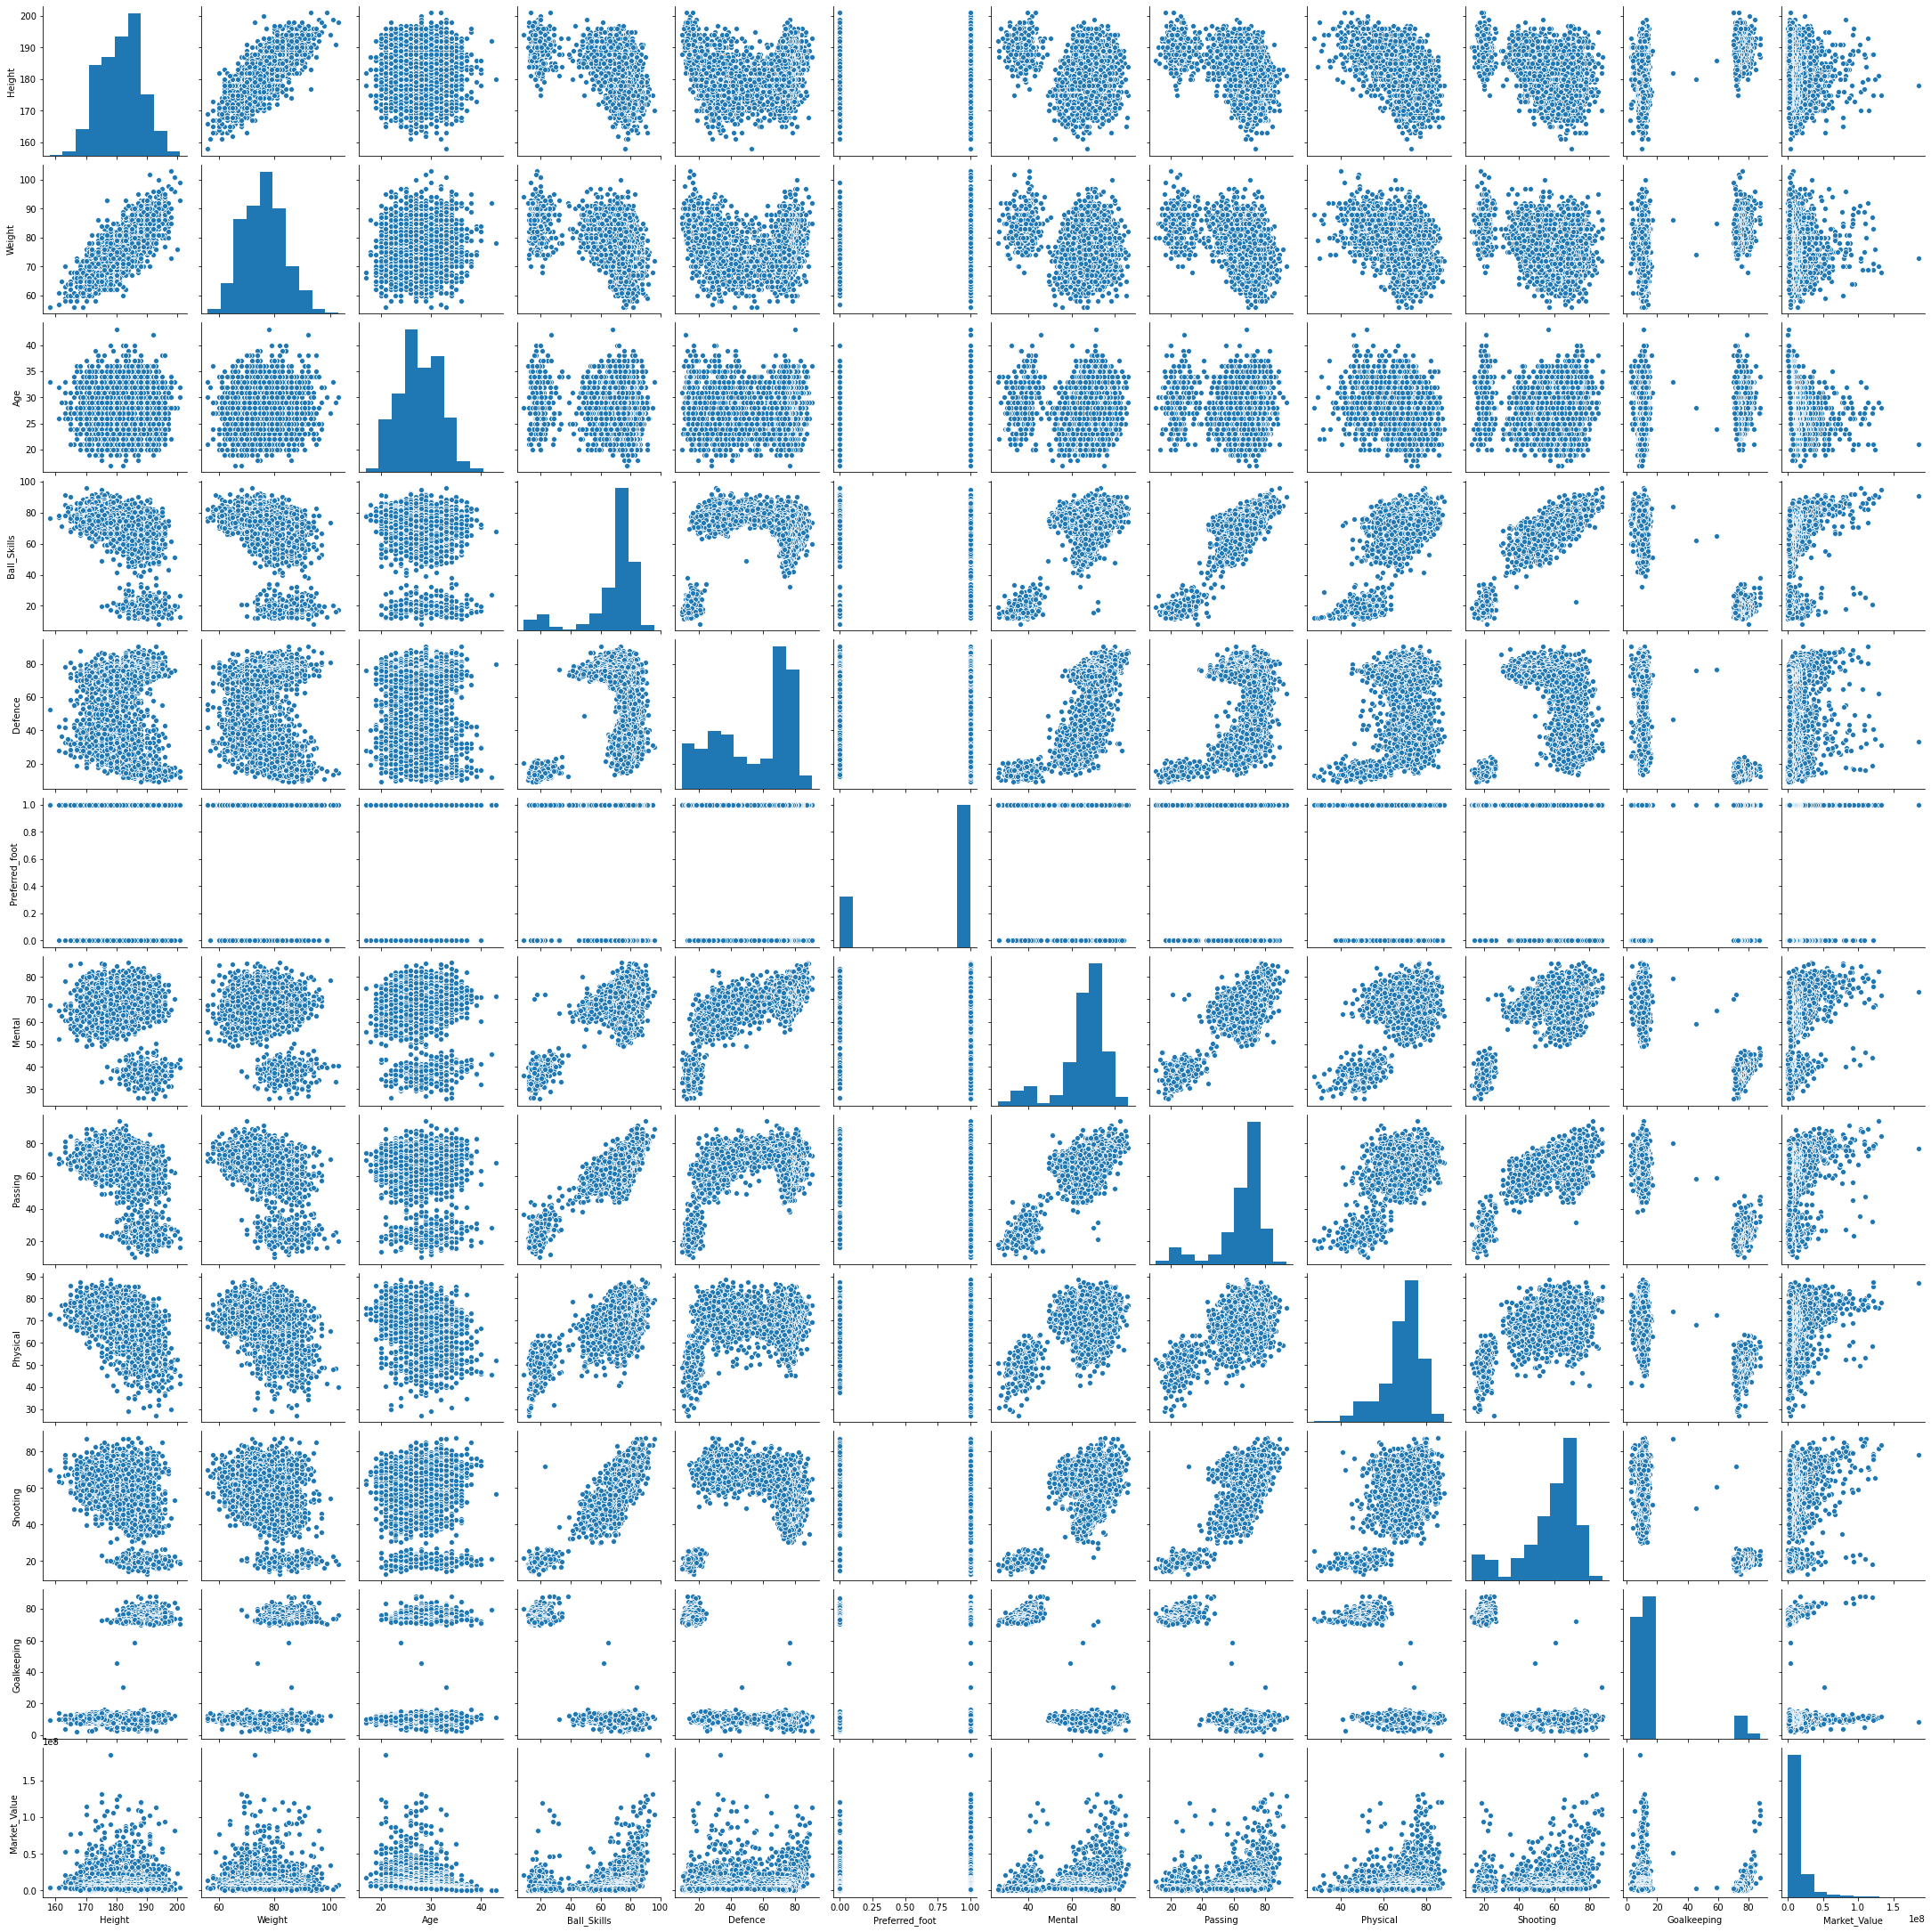

In [11]:
sns.pairplot(df2)

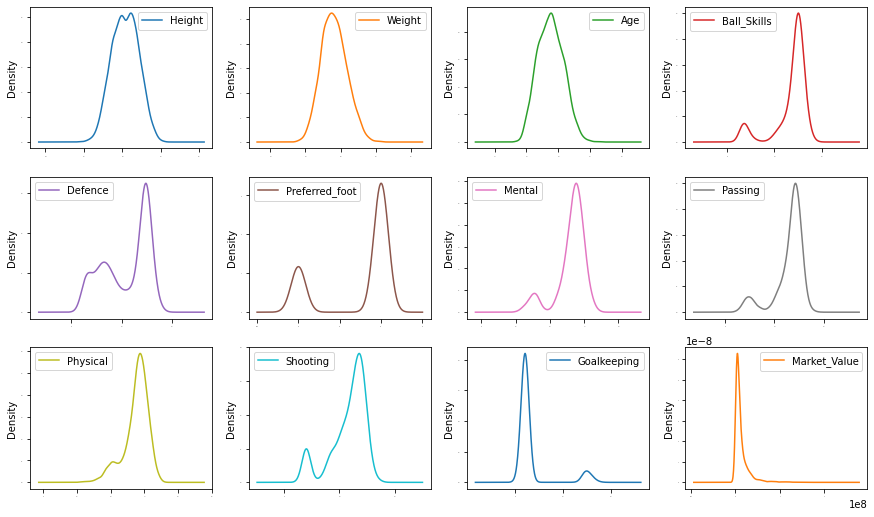

In [12]:
df2.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=True, fontsize=1, figsize=(15,12))
plt.show()

In [13]:
df2.corr().round(2)

,Height,Weight,Age,Ball_Skills,Defence,Preferred_foot,Mental,Passing,Physical,Shooting,Goalkeeping,Market_Value
Height,1.00,0.78,0.07,-0.51,-0.07,0.11,-0.28,-0.49,-0.51,-0.44,0.39,-0.00
Weight,0.78,1.00,0.17,-0.48,-0.09,0.11,-0.25,-0.46,-0.43,-0.38,0.36,-0.02
Age,0.07,0.17,1.00,-0.17,-0.05,0.08,-0.02,-0.10,-0.27,-0.03,0.15,-0.23
Ball_Skills,-0.51,-0.48,-0.17,1.00,0.37,-0.12,0.78,0.92,0.75,0.90,-0.90,0.21
Defence,-0.07,-0.09,-0.05,0.37,1.00,-0.06,0.74,0.54,0.30,0.17,-0.56,0.03
Preferred_foot,0.11,0.11,0.08,-0.12,-0.06,1.00,-0.07,-0.15,-0.10,-0.10,0.10,-0.01
Mental,-0.28,-0.25,-0.02,0.78,0.74,-0.07,1.00,0.83,0.61,0.69,-0.83,0.22
Passing,-0.49,-0.46,-0.10,0.92,0.54,-0.15,0.83,1.00,0.67,0.82,-0.85,0.21
Physical,-0.51,-0.43,-0.27,0.75,0.30,-0.10,0.61,0.67,1.00,0.63,-0.69,0.23
Shooting,-0.44,-0.38,-0.03,0.90,0.17,-0.10,0.69,0.82,0.63,1.00,-0.78,0.18


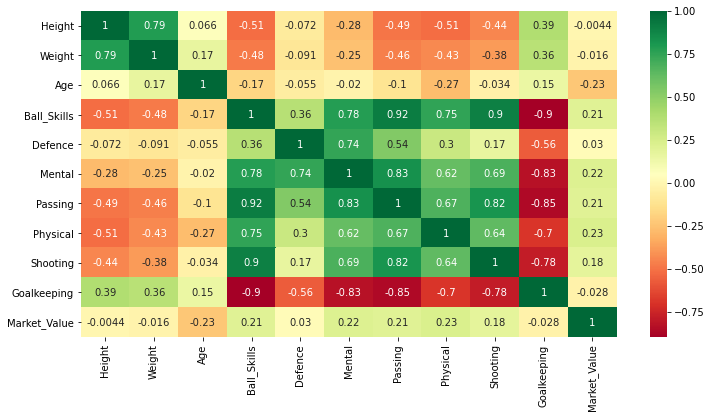

In [14]:
corr_mat = df2.corr()
top_corr_features = corr_mat.index
plt.figure(figsize=(12,6))
sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [15]:
df2.Market_Value.skew()

3.5519667765096647

In [16]:
Market_Value_transformed= np.log(df2.Market_Value)
Market_Value_transformed.skew()

-0.3313669405652935

In [17]:
df3= df2.drop(['Height', 'Weight', 'Preferred_foot', 'Market_Value'], axis= 1)
df3['Market_Value']= Market_Value_transformed

In [18]:
df3.head()

,Age,Ball_Skills,Defence,Mental,Passing,Physical,Shooting,Goalkeeping,Market_Value
0,33,96.0,30.33,73.4,89.00,79.29,86.88,10.8,18.455082
1,35,90.0,28.00,75.4,81.00,85.29,87.38,11.6,17.958645
2,27,21.0,19.00,44.0,32.00,58.43,18.50,87.4,18.603002
3,29,90.0,62.00,82.4,93.67,75.86,81.62,11.2,18.675323
4,28,95.0,31.33,71.6,84.33,78.29,83.62,11.8,18.698312


In [19]:
df3.columns

Index(['Age', 'Ball_Skills', 'Defence', 'Mental', 'Passing', 'Physical',
       'Shooting', 'Goalkeeping', 'Market_Value'],
      dtype='object')

# Model 1 using Linear Regression

In [20]:
X= df3.drop('Market_Value', axis=1)
y= df3.Market_Value

In [22]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [52]:
trainingSet, testingSet= train_test_split(df3, test_size= 0.2, random_state=50)

In [53]:
df3.columns

Index(['Age', 'Ball_Skills', 'Defence', 'Mental', 'Passing', 'Physical',
       'Shooting', 'Goalkeeping', 'Market_Value'],
      dtype='object')

In [54]:
model_11 = smf.ols(formula = """Market_Value ~ Age + Ball_Skills +
                   Defence + Mental + Passing + Physical + Shooting +
                   Goalkeeping""", data = trainingSet)
result_11 = model_11.fit()
print(result_11.summary())

                            OLS Regression Results                            
Dep. Variable:           Market_Value   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     266.5
Date:                Sun, 04 Oct 2020   Prob (F-statistic):          2.03e-322
Time:                        21:56:43   Log-Likelihood:                -2531.2
No. Observations:                2350   AIC:                             5080.
Df Residuals:                    2341   BIC:                             5132.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      11.7680      0.269     43.670      

In [55]:
pred_11= result_11.predict(testingSet[['Age', 'Ball_Skills', 'Defence', 'Mental', 'Passing',
                                       'Physical','Shooting', 'Goalkeeping']])

In [56]:
RMSE_11= np.sqrt(mean_squared_error(testingSet.Market_Value, pred_11))
print("RMSE : ", RMSE_11)

RMSE :  0.7282915123705627


In [ ]:
#Polynomial Regression

In [105]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold

In [97]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 50)

In [103]:
#r2=[]

for degree in range(2,11):
    model_12= make_pipeline(PolynomialFeatures(degree), LinearRegression())
    result_12= model_12.fit(X_train, y_train)
    pred_12= result_12.predict(X_test)
    rmse= np.sqrt(mean_squared_error(y_test, pred_12))
    print(degree, ':', rmse)

2 : 0.4807411080842943
3 : 0.4330751029787362
4 : 1.0248237724691593
5 : 10.420250385709254
6 : 4635.756775498117
7 : 538.2616713465651
8 : 387.4723749209767
9 : 373.39025118520647
10 : 357.3907932300135


In [111]:
poly = make_pipeline(PolynomialFeatures(3), LinearRegression())
poly= poly.fit(X_train,y_train)
predicted = poly.predict(X_test)

In [117]:
np.sqrt(mean_squared_error(y_test, predicted))
r2_score(y_test, predicted)

0.8204393907858455

In [106]:
kf = KFold(n_splits=5, shuffle=True, random_state = 50)

In [108]:
model_13 = make_pipeline(PolynomialFeatures(3), LinearRegression())
Mean_R2_Poly_CV = np.mean(cross_val_score(model_13, X_train, y_train, cv=kf, scoring='r2'))
Mean_R2_Poly_CV

0.7828273734660867

# Model 2 using Random Forest

In [23]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 50)

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
model_21= RandomForestRegressor()
model_21= model_21.fit(X_train, y_train)
model_21

RandomForestRegressor()

In [26]:
pred_21= model_21.predict(X_test)

In [27]:
print("R2 on training data : ",model_21.score(X_train, y_train))
print("R2 on testing data : ",model_21.score(X_test, y_test))
print('RMSE on testing data : ', np.sqrt(mean_squared_error(y_test, pred_21)))

R2 on training data :  0.9749225091636501
R2 on testing data :  0.8154936460985431
RMSE on testing data :  0.43899881259503387


In [28]:
from sklearn.model_selection import cross_val_score
CV_2 =cross_val_score(model_21 ,X, y, cv=5, scoring='r2')
CV_2.mean()

-0.054033391929243946

### Hyper parameter tuning

In [29]:
from sklearn.model_selection import RandomizedSearchCV

In [30]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 110, num = 11)]
#max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

In [31]:
#Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [32]:
# Use the random grid to search for best hyperparameters

# First create the base model to tune
rf = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state = 10, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   54.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 12.9min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 11, 22, 33, 44, 55, 66,
                                                      77, 88, 99, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=10, verbose=2)

In [34]:
rf_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 88,
 'bootstrap': True}

In [35]:
# Manually provide the best parameters to model for training
model_22 = RandomForestRegressor(**{'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 88,
 'bootstrap': True})

In [36]:
model_22.fit(X_train, y_train)

RandomForestRegressor(max_depth=88, n_estimators=1800)

In [37]:
pred_22= model_22.predict(X_test)

In [38]:
print('R2 on train data: ', model_22.score(X_train, y_train))
print('R2 on test data: ', model_22.score(X_test, y_test))
print('RMSE on test data : ', np.sqrt(mean_squared_error(y_test, pred_22)))

R2 on train data:  0.9762080607133117
R2 on test data:  0.8160215391165645
RMSE on test data :  0.43837035074991226


In [39]:
import pickle

In [40]:
# open a file, where you ant to store the data
file = open('FIFA_RFR_model.pkl', 'wb')

# dump information to that file
pickle.dump(model_22, file)